## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten (2019)
# Datenbereinigung der Lernendenbefragung 2019


#### Werkzeuge und Daten importieren

In [65]:
import pandas as pd
import numpy as np
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [66]:
Rohdaten = pd.read_csv('D:\Daten\DISS\Daten\EstrategiasEstudiantesKienberger2019.tsv', sep = '\t', encoding='utf-16')

In [67]:
Rohdaten.head(4)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q8b21a_7_TEXT,D-Q8b21b,D-Q8b21c,D-Q8b22a,D-Q8b22a_7_TEXT,D-Q8b22b,D-Q8b22c,D-Q9,E-Q1,E-Q2
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,¿Cómo ha aprendido fundamentalmente latín? - O...,¿Durante cuántos años ha estudiado latín?,Comentarios (opcional):,¿Cómo ha aprendido fundamentalmente el o los d...,¿Cómo ha aprendido fundamentalmente el o los d...,¿Qué nivel ha alcanzado?,Comentarios (opcional):,¿Dónde ha rellenado esta encuesta?,"Si lo desea, puede escribir un comentario y da...",¿Tiene interés en participar en la segunda par...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID151_7_TEXT""}","{""ImportId"":""QID152_TEXT""}","{""ImportId"":""QID153_TEXT""}","{""ImportId"":""QID89""}","{""ImportId"":""QID89_7_TEXT""}","{""ImportId"":""QID168""}","{""ImportId"":""QID169_TEXT""}","{""ImportId"":""QID96""}","{""ImportId"":""QID94_TEXT""}","{""ImportId"":""QID189_TEXT""}"
2,2019-02-05 04:50:57,2019-02-05 04:53:52,1,NaN,100,175,1,2019-02-05 04:53:53,R_22VmzxKFyFS3mpg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kjjffe,kjj
3,2019-02-12 12:36:39,2019-02-12 12:38:41,0,81.0.32.65,100,122,1,2019-02-12 12:38:43,R_UMePfKxllpOEyKR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
Rohdaten = Rohdaten.drop(1)

#### Glossar erstellen

In [69]:
gloss = pd.DataFrame(Rohdaten.loc[0])

In [70]:
def get_name_gloss(word):
    for i, val in enumerate(gloss[0]):
        if word.lower() in str(val).lower():
            return i, gloss.index[i]

In [71]:
Rohdaten = Rohdaten.drop(0).reset_index(drop=True)
Rohdaten.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q8b21a_7_TEXT,D-Q8b21b,D-Q8b21c,D-Q8b22a,D-Q8b22a_7_TEXT,D-Q8b22b,D-Q8b22c,D-Q9,E-Q1,E-Q2
0,2019-02-05 04:50:57,2019-02-05 04:53:52,1,NaN,100,175,1,2019-02-05 04:53:53,R_22VmzxKFyFS3mpg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kjjffe,kjj
1,2019-02-12 12:36:39,2019-02-12 12:38:41,0,81.0.32.65,100,122,1,2019-02-12 12:38:43,R_UMePfKxllpOEyKR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-02-13 11:18:06,2019-02-13 11:36:49,0,212.128.135.98,100,1122,1,2019-02-13 11:36:50,R_2pQsE2By2d501z9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,mario2000@usal.es


### Gültige Daten auswählen

##### Tests entfernen:

In [72]:
Daten = Rohdaten[Rohdaten['DistributionChannel'] != 'preview'].reset_index(drop=True)
Daten.head(2)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q8b21a_7_TEXT,D-Q8b21b,D-Q8b21c,D-Q8b22a,D-Q8b22a_7_TEXT,D-Q8b22b,D-Q8b22c,D-Q9,E-Q1,E-Q2
0,2019-02-12 12:36:39,2019-02-12 12:38:41,0,81.0.32.65,100,122,1,2019-02-12 12:38:43,R_UMePfKxllpOEyKR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-13 11:18:06,2019-02-13 11:36:49,0,212.128.135.98,100,1122,1,2019-02-13 11:36:50,R_2pQsE2By2d501z9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,mario2000@usal.es


In [73]:
ind_test = []
for j, wert in enumerate(Daten['A-Q1']):
    if 'test' in str(wert):
        ind_test.append(j)
    if 'Test' in str(wert):
        ind_test.append(j)

In [74]:
Daten = Daten.drop(ind_test).reset_index(drop=True)

##### Fertig ausgefüllte Fragebögen:

In [75]:
Finished = Daten[Daten['Finished'] == '1'].reset_index(drop=True)

In [76]:
Finished.shape

(31, 211)

##### Fragebögen mit fehlenden Werten ermitteln:

In [77]:
def count_nan(row):
    cnt = 0
    for el in row:
        if (str(el) == 'nan'):
            cnt = cnt + 1
    return cnt*100/len(row)

In [78]:
porc_nan = []
for i in range(Finished.shape[0]):
    porc_nan.append(count_nan(Finished.loc[i]))

In [79]:
Finished['porc_nan'] = porc_nan

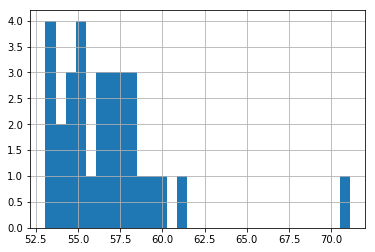

In [80]:
Finished['porc_nan'].hist(bins=30)

In [81]:
Finished[Finished['porc_nan'] > 62].index

Int64Index([0], dtype='int64')

In [82]:
Finished = Finished.drop(Finished[Finished['porc_nan'] > 62].index).reset_index(drop=True)

In [83]:
Finished.shape

(30, 212)

In [84]:
Datenber = Finished

### Art der Werte kontrollieren und anpassen

In [85]:
#Datenber.dtypes

In [86]:
Datenber['B-Q1']

0           2,3,4,6,9
1           1,2,6,7,9
2             6,7,8,9
3       1,2,3,5,6,7,8
4         2,3,5,7,8,9
5               1,2,7
6     1,2,3,5,6,7,8,9
7             1,2,3,7
8          1,2,3,6,10
9                 NaN
10          2,3,5,6,7
11                4,9
12                  2
13          1,2,5,7,9
14            1,3,4,5
15            2,3,5,9
16        1,2,3,4,6,9
17          1,2,3,7,9
18                  9
19          2,3,4,6,9
20      1,2,4,5,6,7,8
21       5,6,7,8,9,10
22              1,2,7
23              1,2,6
24      1,2,5,6,7,8,9
25                  2
26                4,5
27              1,6,7
28          2,3,4,6,7
29       1,2,5,6,7,10
Name: B-Q1, dtype: object

##### Multiple-Choice-Format

Multiple-Choice-Antworten werden jeweils in einem Feld der Excel-Tabelle unter einer Variable (z.B. Frage "B-Q1") gespeichert. Um diese auswerten zu können, müssen diese Felder aufgeteilt werden. Dazu werden sogenannte "Dummy-Variablen" erstellt. Für jede in der Befragung gewählte Multiple-Choice-Antwort wird eine solche Variable erstellt und als neue Spalte in die Excel-Tabelle eingefügt. Dieser Vorgang wird für alle Multiple-Choice-Fragen durchgeführt.

*Anzahl der Dummy-Variablen feststellen:*

In [87]:
def get_itemlist(df,var):
    vals = df[var].dropna().reset_index(drop=True)
    lista_strings = vals[0].split(',')
    for val in vals:
        lst = str(val).split(',')
        lst_add = [el for el in lst if el not in lista_strings]
        if lst_add:
            lista_strings = lista_strings + lst_add
    return list(sort([int(el) for el in lista_strings]))

*Dummy-Variablen erstellen:*

In [88]:
def dummies_multiple(df, col):
    # leere Tabelle erstellen
    columns = [str(el) for el in get_itemlist(df,col)]
    ind = range(df.shape[0])
    df_int = pd.DataFrame(index=ind, columns=columns)
    df_int = df_int.fillna(0)
    
    for i in ind:
        if str(df.loc[i,col]) != 'nan':
            list1 = str(df.loc[i,col]).split(',')
            df_int.loc[i,list1] = np.ones(len(list1), dtype = int)
    
    df_int.columns = ['{}_{}'.format(col,column) for column in columns]
    return df_int

In [89]:
def insert_dummies(df,col):
    df_insert = dummies_multiple(df,col)
    return pd.concat([ df.loc[:,:col], df_insert, df.loc[:,col:] ], axis = 1).drop(col,axis = 1)

In [91]:
var_choice = ['B-Q1','B-Q2-1','B-Q2-2','B-Q2-3','B-Q2-4','B-Q2-5','B-Q2-6','B-Q2-7','B-Q2-8','B-Q2-9','D-Q8b1a','D-Q8b5a','D-Q8b6a','D-Q8b10a','D-Q8b12a','D-Q8b13a','D-Q8b14a','D-Q8b15a','D-Q8b16a','D-Q8b20a','D-Q8b21a','D-Q9']

In [92]:
for col in var_choice:
    Datenber = insert_dummies(Datenber,col)

##### Format für fehlende Werte

In [93]:
Datenber = Datenber.fillna(0)

Fehlende Werte werden grundsätzlich als "NaN" definiert, was zu Problemen bei der Analyse führen kann. Da der Wert "0" nur in wenigen Fragen vorkommt, bei denen keine Werte fehlen, kann "NaN" durch "0" ersetzt werden.

##### Numerische Werte

*Auswahl der Spalten ohne Texteingabe:*

In [94]:
#gloss.loc['D-Q1a'][0]

In [95]:
gloss1 = pd.DataFrame(Datenber.loc[0])

In [96]:
liste_ohne_komm = [ind for ind in gloss1.index if 'comentario' not in str(gloss1.loc[ind][0]).lower()]

In [97]:
liste_ohne_text = [col for col in liste_ohne_komm if 'text' not in col.lower()]

In [98]:
def get_var_num(lst,var):
    return [col for col in lst if var not in col]

In [99]:
liste_fragen_num = [col for col in liste_ohne_text if 'Q' in col]
_vars_ = ['A-Q1','D-Q1a','D-Q4a','D-Q7a','D-Q7d','D-Q7g','D-Q8a','D-Q8b1c','D-Q8b2c','D-Q8b3c','D-Q8b4c','D-Q8b5c','D-Q8b6c','D-Q8b7c','D-Q8b8c','D-Q8b9c','D-Q8b10c','D-Q8b11c','D-Q8b12c','D-Q8b13c','D-Q8b14c','D-Q8b15c','D-Q8b16c','D-Q8b17c','D-Q8b18c','D-Q8b19c','D-Q8b20c','D-Q8b21c','D-Q8b22c','E-Q1','E-Q2']
for var in _vars_:
    liste_fragen_num = get_var_num(liste_fragen_num,var)

*Verschiedene Formate in numerische Werte umwandeln:*

In [100]:
def Werte_numm(s):
    return pd.to_numeric(s, downcast='integer')

Als Text (object) gelesene Werte werden in numerische Werte umgewandelt, bevorzugt wird das Datenformat "integer" verwendet. Bei negativen Werten oder Dezimalstellen wird "float" verwendet.

In [101]:
for el in liste_fragen_num:
    Datenber[el] = Werte_numm(Datenber[el])

In [102]:
lista_float = []
for i, tipo in enumerate(Datenber.dtypes):
    if 'float' in str(tipo):
        lista_float.append(Datenber.columns[i])
lista_float

['porc_nan']

In [38]:
#Datenber.dtypes

### Daten speichern

In [106]:
gloss.to_pickle('D:\Daten\DISS\Daten\Gloss2019')

#### Daten ohne E-Mail-Kontakt

In [108]:
Datenber = Datenber.drop(columns='E-Q2')

In [109]:
Datenber.to_excel('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Kienberger_2019_ber.xlsx',encoding='utf-16')

In [110]:
Datenber.to_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_2019_ber')

In [111]:
Datenber.to_csv('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Kienberger_2019_ber.csv',encoding='utf-16')

#### Daten ohne Text für IRT

In [112]:
Datenber1 = Datenber[liste_fragen_num]

In [113]:
Datenber1.to_csv('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Kienberger_2019_ber1.csv',encoding='utf-16')